In [39]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Missing Values:
 neighborhood               0
distance_to_city_center    0
distance_to_metro          0
distance_to_school         0
crime_rate                 0
house_age                  0
total_area                 0
bedrooms                   0
bathrooms                  0
floors                     0
garage                     0
garden                     0
basement                   0
balcony                    0
construction_quality       0
renovation_status          0
heating_type               0
air_conditioning           0
parking_spaces             0
energy_efficiency          0
listing_duration           0
season_sold                0
year_sold                  0
sale_price                 0
dtype: int64

Summary Statistics:
        neighborhood  distance_to_city_center  distance_to_metro  \
count          8000              8000.000000        8000.000000   
unique           15                      NaN                NaN   
top        Lakeside                      NaN       

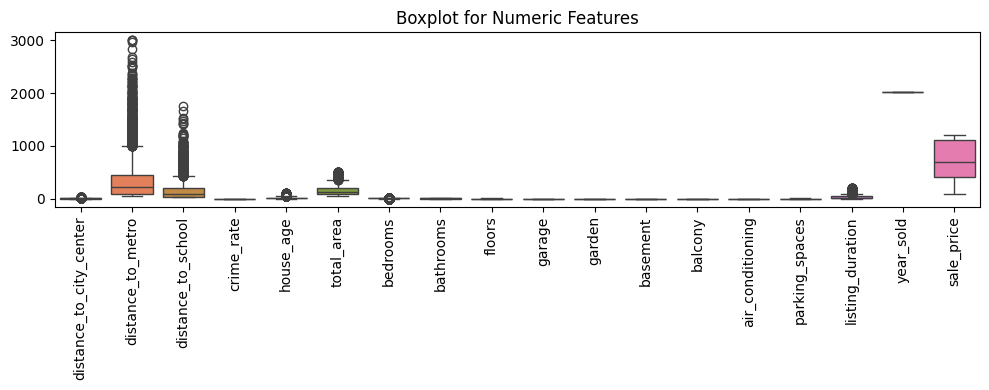

In [40]:
#Task 1: Data Loading and Exploration

df = pd.read_csv('house_price_data.csv')

df = df.drop("property_id", axis = 1)

missing_values = df.isnull().sum()

print("Missing Values:\n", df.isnull().sum())

# Get numerical summary
print("\nSummary Statistics:\n",df.describe(include = 'all'))

plt.figure(figsize = (10, 4))
sns.boxplot(data = df.select_dtypes(include = ['float64', 'int64']))
plt.title("Boxplot for Numeric Features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

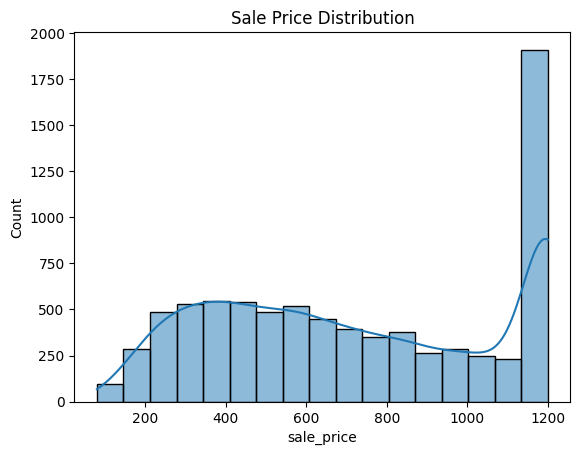

Skewness: 0.07300029773629817


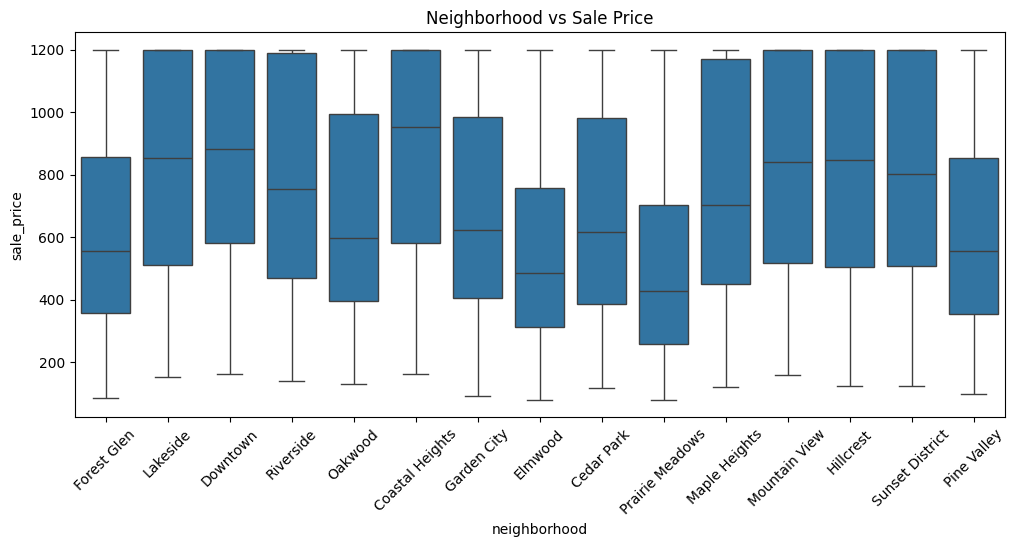

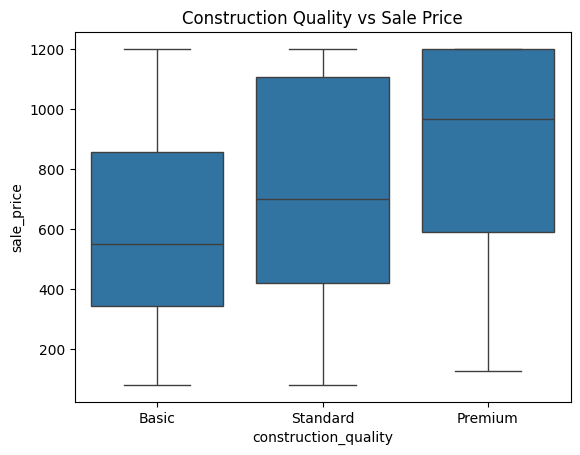

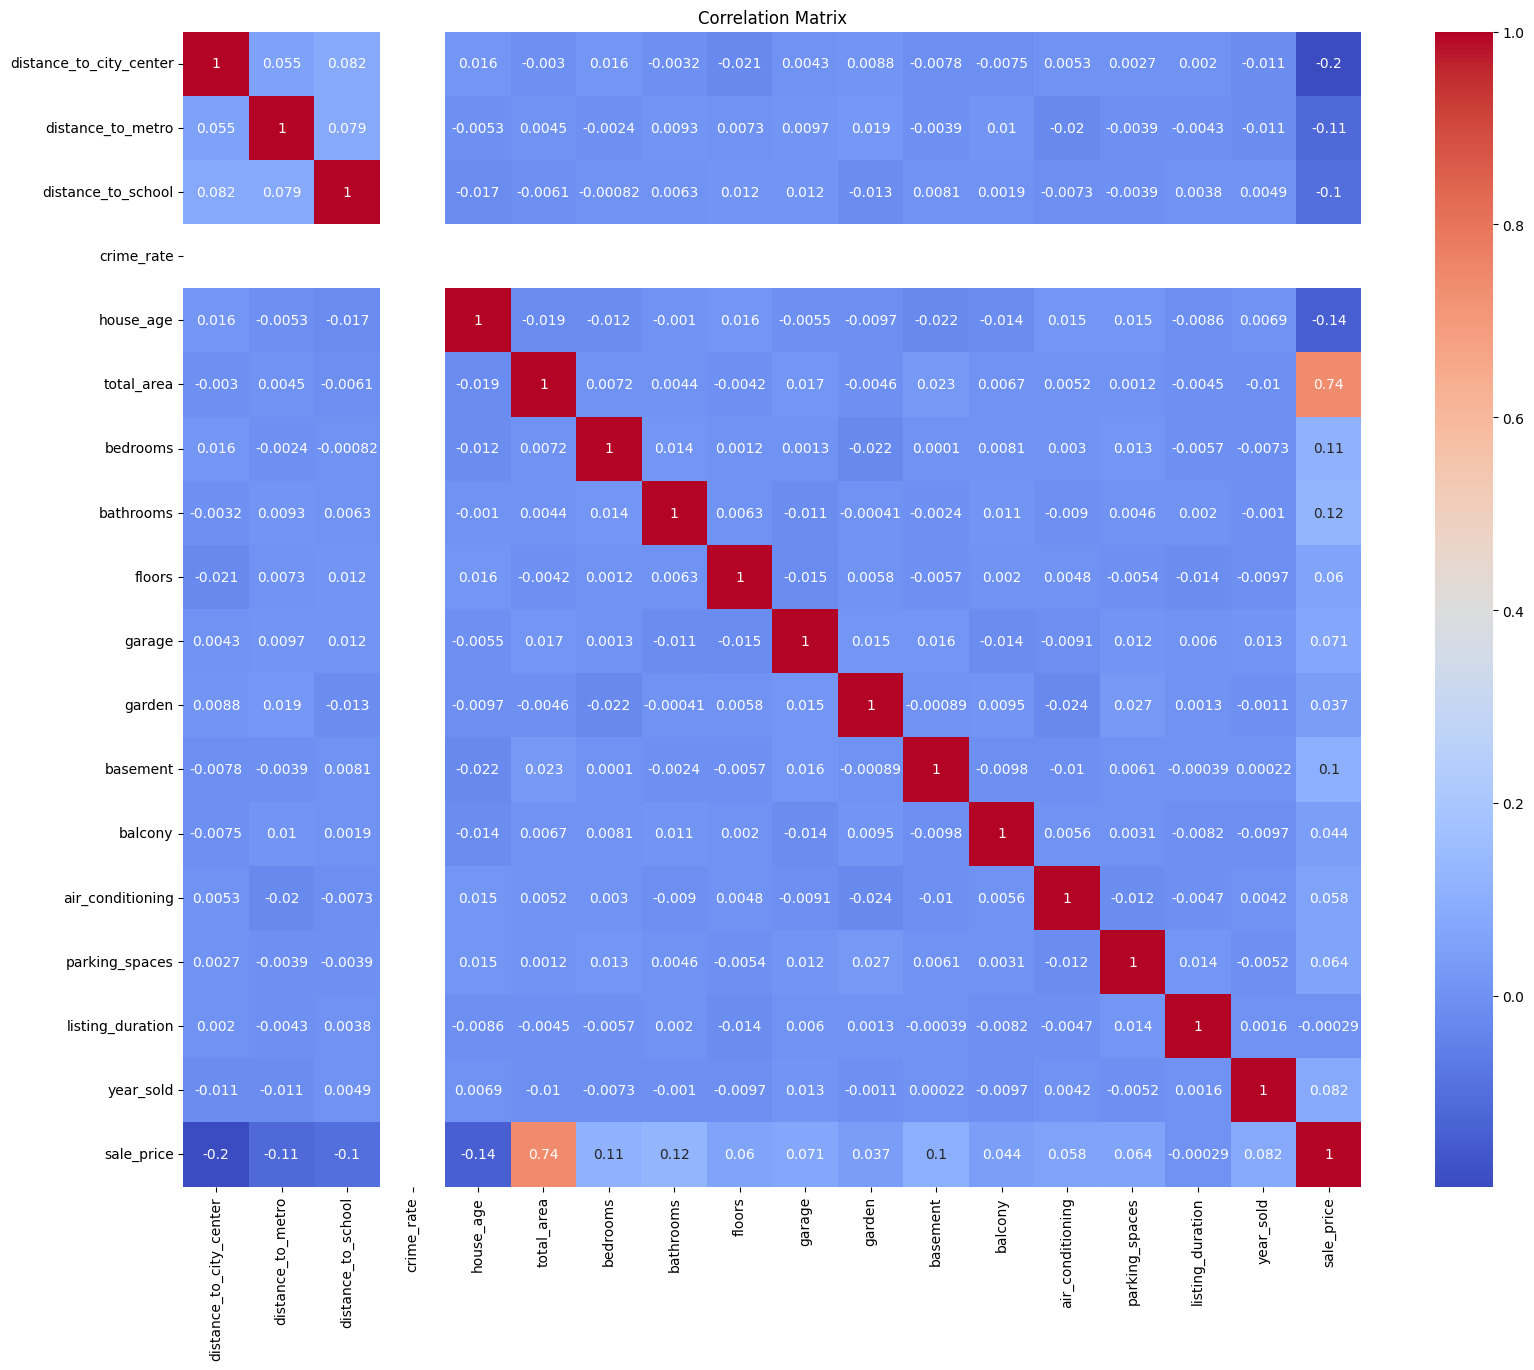

In [41]:
#Task 2: Exploratory Data Analysis

sns.histplot(df["sale_price"], kde = True)
plt.title("Sale Price Distribution")
plt.show()
print("Skewness:",df["sale_price"].skew())

plt.figure(figsize=(12, 5))
sns.boxplot(x = 'neighborhood', y = 'sale_price', data = df)
plt.xticks(rotation = 45)
plt.title("Neighborhood vs Sale Price")
plt.show()

sns.boxplot(x = 'construction_quality', y = 'sale_price', data = df)
plt.title("Construction Quality vs Sale Price")
plt.show()

plt.figure(figsize = (19, 15))
corr = df.select_dtypes(include = ['int64', 'float64']).corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [42]:
#Task 3: Feature Engineering and Preprocessing

X = df.drop("sale_price", axis = 1)
y = df["sale_price"]

num_cols = X.select_dtypes(include = ["int64", "float64"]).columns
cat_cols = X.select_dtypes(include = ["object", "bool"]).columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop = "first", sparse_output = False), cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [43]:
#Task 4: Model Development

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


MAE: 1.1e+02
MSE: 2e+04
RMSE: 1.4e+02
R²: 0.8326


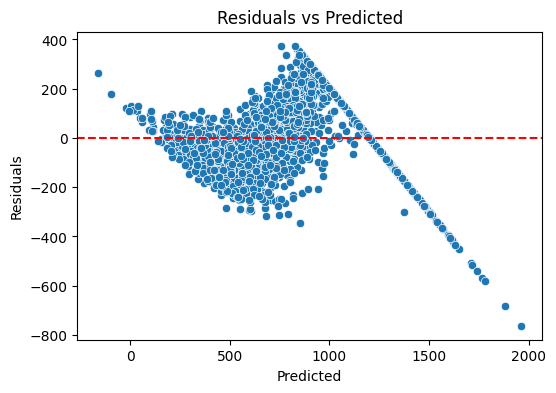

In [44]:
#Task 5: Model Evaluation

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2}")
print(f"MSE: {mse:.2}")
print(f"RMSE: {rmse:.2}")
print(f"R²: {r2:.4f}")

residuals = y_test - y_pred
plt.figure(figsize = (6, 4))
sns.scatterplot(x = y_pred, y = residuals)
plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()
